# Is Digital Access Truly Universal in Europe?
## The Role of Income and Education (2024)


## Research Questions

1. How does internet access vary across European countries?
2. Is internet access correlated with income levels?
3. Is internet access correlated with education attainment?
4. Are there countries that deviate from the expected pattern?


## Data Sources and License

- Internet access data: Eurostat, dataset TIN00134
- Income data: Eurostat, dataset ilc_di03
- Education data: Eurostat, dataset edat_lfse_03

All datasets are released under the Eurostat Open Data License
and can be reused with attribution.


In [8]:
import sys
!{sys.executable} -m pip install plotly



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: /opt/anaconda3/envs/homl3/bin/python3 -m pip install --upgrade pip


In [9]:
import sys
!{sys.executable} -m pip install kaleido



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: /opt/anaconda3/envs/homl3/bin/python3 -m pip install --upgrade pip


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [123]:
# Load internet access dataset (2024)

internet_raw = pd.read_csv("data/raw/internet_access_2024.csv")

# Quick look
internet_raw.head()


,DATAFLOW,LAST UPDATE,freq,unit,hhtyp,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:TIN00134(1.0),16/12/25 11:00:00,Annual,Percentage of households,Total,Albania,2024,98.15,NaN,NaN
1,ESTAT:TIN00134(1.0),16/12/25 11:00:00,Annual,Percentage of households,Total,Austria,2024,94.96,NaN,NaN
2,ESTAT:TIN00134(1.0),16/12/25 11:00:00,Annual,Percentage of households,Total,Bosnia and Herzegovina,2024,84.19,NaN,NaN
3,ESTAT:TIN00134(1.0),16/12/25 11:00:00,Annual,Percentage of households,Total,Belgium,2024,94.62,NaN,NaN
4,ESTAT:TIN00134(1.0),16/12/25 11:00:00,Annual,Percentage of households,Total,Bulgaria,2024,92.12,NaN,NaN


In [125]:
internet = internet_raw[
    ["geo", "TIME_PERIOD", "OBS_VALUE"]
].copy()

internet.head()


,geo,TIME_PERIOD,OBS_VALUE
0,Albania,2024,98.15
1,Austria,2024,94.96
2,Bosnia and Herzegovina,2024,84.19
3,Belgium,2024,94.62
4,Bulgaria,2024,92.12


In [127]:
internet = internet.rename(columns={
    "geo": "country",
    "TIME_PERIOD": "year",
    "OBS_VALUE": "internet_access_pct"
})

internet.head()


,country,year,internet_access_pct
0,Albania,2024,98.15
1,Austria,2024,94.96
2,Bosnia and Herzegovina,2024,84.19
3,Belgium,2024,94.62
4,Bulgaria,2024,92.12


In [129]:
# Check missing values
internet.isna().sum()


country                0
year                   0
internet_access_pct    6
dtype: int64

In [131]:
# to see the null values
internet[internet["internet_access_pct"].isna()]

,country,year,internet_access_pct
5,Switzerland,2024,NaN
10,Euro area - 19 countries (2015-2022),2024,NaN
11,Euro area – 20 countries (2023-2025),2024,NaN
21,Iceland,2024,NaN
23,Liechtenstein,2024,NaN
40,United Kingdom,2024,NaN


In [133]:
# drop the rows 
internet = internet.drop(
    internet[internet["country"].isin([
        "United Kingdom",
        "Euro area - 19 countries (2015-2022)",
        "Euro area – 20 countries (2023-2025)"
    ])].index
)


In [135]:
# to make sure we drop them successfully 
internet["country"].isin([
    "United Kingdom",
    "Euro area - 19 countries (2015-2022)",
    "Euro area – 20 countries (2023-2025)"
]).sum()


0

In [137]:
internet

,country,year,internet_access_pct
0,Albania,2024,98.15
1,Austria,2024,94.96
2,Bosnia and Herzegovina,2024,84.19
3,Belgium,2024,94.62
4,Bulgaria,2024,92.12
5,Switzerland,2024,NaN
6,Cyprus,2024,94.92
7,Czechia,2024,94.56
8,Germany,2024,92.65
9,Denmark,2024,96.92


# Load and inspect DataSet 2, for income

In [140]:
# Load income dataset (2024)

income_raw = pd.read_csv("data/raw/median_income_2024.csv")

# Quick look
income_raw.head()


,DATAFLOW,LAST UPDATE,freq,unit,indic_il,deg_urb,sex,age,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:ILC_DI17$DEFAULTVIEW(1.0),04/10/24 23:00:00,Annual,Euro,Mean equivalised net income,Cities,Total,Total,Albania,2016,NaN,NaN,NaN
1,ESTAT:ILC_DI17$DEFAULTVIEW(1.0),04/10/24 23:00:00,Annual,Euro,Mean equivalised net income,Cities,Total,Total,Albania,2017,2646.0,NaN,NaN
2,ESTAT:ILC_DI17$DEFAULTVIEW(1.0),04/10/24 23:00:00,Annual,Euro,Mean equivalised net income,Cities,Total,Total,Albania,2018,2895.0,NaN,NaN
3,ESTAT:ILC_DI17$DEFAULTVIEW(1.0),04/10/24 23:00:00,Annual,Euro,Mean equivalised net income,Cities,Total,Total,Albania,2019,3195.0,NaN,NaN
4,ESTAT:ILC_DI17$DEFAULTVIEW(1.0),04/10/24 23:00:00,Annual,Euro,Mean equivalised net income,Cities,Total,Total,Albania,2020,3579.0,NaN,NaN


In [142]:
income_raw.columns


Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'indic_il', 'deg_urb', 'sex',
       'age', 'geo', 'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG', 'CONF_STATUS'],
      dtype='object')

In [144]:
income = income_raw[["geo", "TIME_PERIOD", "OBS_VALUE"]]
income = income.rename(columns={
    "geo": "country",
    "TIME_PERIOD": "year",
    "OBS_VALUE": "mean_income_eur"
})

income.head()


,country,year,mean_income_eur
0,Albania,2016,NaN
1,Albania,2017,2646.0
2,Albania,2018,2895.0
3,Albania,2019,3195.0
4,Albania,2020,3579.0


In [146]:
income_2024 = income[income["year"]== 2024].copy()
income_2024.head()

,country,year,mean_income_eur
8,Albania,2024,NaN
18,Austria,2024,36705.0
28,Belgium,2024,30849.0
38,Bulgaria,2024,12271.0
48,Switzerland,2024,62306.0


In [148]:
print("\nthe null values in each column\n",income_2024.isna().sum())
print("\nvalues in each column\n",income_2024.count())


the null values in each column
 country             0
year                0
mean_income_eur    10
dtype: int64

values in each column
 country            42
year               42
mean_income_eur    32
dtype: int64


In [150]:
income_2024[income_2024["mean_income_eur"].isna()]

,country,year,mean_income_eur
8,Albania,2024,NaN
98,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",2024,NaN
108,Euro area - 18 countries (2014),2024,NaN
118,Euro area - 19 countries (2015-2022),2024,NaN
168,"European Union (EU6-1958, EU9-1973, EU10-1981,...",2024,NaN
178,European Union - 27 countries (2007-2013),2024,NaN
198,European Union - 28 countries (2013-2020),2024,NaN
258,Iceland,2024,NaN
308,North Macedonia,2024,NaN
418,United Kingdom,2024,NaN


In [152]:
rows_to_drop = [
    "United Kingdom",
    "Euro area (EA11-1999, EA12-2001, EA13-2007, EA...)",
    "Euro area - 18 countries (2014)",
    "Euro area - 19 countries (2015-2022)",
    "European Union (EU6-1958, EU9-1973, EU10-1981,...)",
    "European Union - 27 countries (2007-2013)",
    "European Union - 28 countries (2013-2020)"
]

income_2024 = income_2024.drop(
    income_2024[income_2024["country"].isin(rows_to_drop)].index
)

income_2024.reset_index(drop=True, inplace=True)

income_2024


,country,year,mean_income_eur
0,Albania,2024,NaN
1,Austria,2024,36705.0
2,Belgium,2024,30849.0
3,Bulgaria,2024,12271.0
4,Switzerland,2024,62306.0
5,Cyprus,2024,25613.0
6,Czechia,2024,18075.0
7,Germany,2024,32247.0
8,Denmark,2024,40306.0
9,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",2024,NaN


In [154]:
mask = income_2024["country"].str.contains(
    "Euro area|European Union",
    case=False,
    na=False
)

income_2024 = income_2024.drop(income_2024[mask].index)

income_2024.reset_index(drop=True, inplace=True)

income_2024


,country,year,mean_income_eur
0,Albania,2024,NaN
1,Austria,2024,36705.0
2,Belgium,2024,30849.0
3,Bulgaria,2024,12271.0
4,Switzerland,2024,62306.0
5,Cyprus,2024,25613.0
6,Czechia,2024,18075.0
7,Germany,2024,32247.0
8,Denmark,2024,40306.0
9,Estonia,2024,19200.0


# Load and inspect DataSet 3, for education

In [157]:
# Load education dataset (2024)

education_raw = pd.read_csv("data/raw/tertiary_education_2024.csv")

education_raw.head()


,DATAFLOW,LAST UPDATE,freq,sex,age,unit,isced11,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:TESEM030(1.0),11/12/25 23:00:00,Annual,Total,From 30 to 34 years,Percentage,Tertiary education (levels 5-8),Albania,2024,NaN,NaN,NaN
1,ESTAT:TESEM030(1.0),11/12/25 23:00:00,Annual,Total,From 30 to 34 years,Percentage,Tertiary education (levels 5-8),Austria,2024,44.3,NaN,NaN
2,ESTAT:TESEM030(1.0),11/12/25 23:00:00,Annual,Total,From 30 to 34 years,Percentage,Tertiary education (levels 5-8),Bosnia and Herzegovina,2024,26.7,NaN,NaN
3,ESTAT:TESEM030(1.0),11/12/25 23:00:00,Annual,Total,From 30 to 34 years,Percentage,Tertiary education (levels 5-8),Belgium,2024,50.9,NaN,NaN
4,ESTAT:TESEM030(1.0),11/12/25 23:00:00,Annual,Total,From 30 to 34 years,Percentage,Tertiary education (levels 5-8),Bulgaria,2024,39.7,b,NaN


In [159]:
education = education_raw[[
    "geo",
    "TIME_PERIOD",
    "OBS_VALUE",
    "isced11"
]].rename(columns={
    "geo": "country",
    "TIME_PERIOD": "year",
    "OBS_VALUE": "tertiary_education_pct",
    "isced11":"education_level"
}).copy()

education



,country,year,tertiary_education_pct,education_level
0,Albania,2024,NaN,Tertiary education (levels 5-8)
1,Austria,2024,44.3,Tertiary education (levels 5-8)
2,Bosnia and Herzegovina,2024,26.7,Tertiary education (levels 5-8)
3,Belgium,2024,50.9,Tertiary education (levels 5-8)
4,Bulgaria,2024,39.7,Tertiary education (levels 5-8)
5,Switzerland,2024,53.6,Tertiary education (levels 5-8)
6,Cyprus,2024,64.4,Tertiary education (levels 5-8)
7,Czechia,2024,35.0,Tertiary education (levels 5-8)
8,Germany,2024,42.4,Tertiary education (levels 5-8)
9,Denmark,2024,54.9,Tertiary education (levels 5-8)


In [161]:
print(education.isna().sum())
print(education["country"].nunique())

country                   0
year                      0
tertiary_education_pct    5
education_level           0
dtype: int64
41


In [163]:
education[education["tertiary_education_pct"].isna()]


,country,year,tertiary_education_pct,education_level
0,Albania,2024,NaN,Tertiary education (levels 5-8)
10,Euro area - 19 countries (2015-2022),2024,NaN,Tertiary education (levels 5-8)
23,Liechtenstein,2024,NaN,Tertiary education (levels 5-8)
27,Montenegro,2024,NaN,Tertiary education (levels 5-8)
40,United Kingdom,2024,NaN,Tertiary education (levels 5-8)


In [165]:
education_clean = education.drop(
    education[
        education["country"].str.contains("Euro area", na=False) |
        education["country"].eq("United Kingdom") |
        education["country"].str.contains("European Union", na=False)
    ].index
).copy()

education_clean.reset_index(drop=True, inplace=True)
education_clean


,country,year,tertiary_education_pct,education_level
0,Albania,2024,NaN,Tertiary education (levels 5-8)
1,Austria,2024,44.3,Tertiary education (levels 5-8)
2,Bosnia and Herzegovina,2024,26.7,Tertiary education (levels 5-8)
3,Belgium,2024,50.9,Tertiary education (levels 5-8)
4,Bulgaria,2024,39.7,Tertiary education (levels 5-8)
5,Switzerland,2024,53.6,Tertiary education (levels 5-8)
6,Cyprus,2024,64.4,Tertiary education (levels 5-8)
7,Czechia,2024,35.0,Tertiary education (levels 5-8)
8,Germany,2024,42.4,Tertiary education (levels 5-8)
9,Denmark,2024,54.9,Tertiary education (levels 5-8)


# Merget these three datasets

In [168]:
master = (
    internet
    .merge(income_2024, on="country", how="inner")
    .merge(education_clean, on="country", how="inner")
)
master.reset_index(drop=True, inplace=True)
master




,country,year_x,internet_access_pct,year_y,mean_income_eur,year,tertiary_education_pct,education_level
0,Albania,2024,98.15,2024,NaN,2024,NaN,Tertiary education (levels 5-8)
1,Austria,2024,94.96,2024,36705.0,2024,44.3,Tertiary education (levels 5-8)
2,Belgium,2024,94.62,2024,30849.0,2024,50.9,Tertiary education (levels 5-8)
3,Bulgaria,2024,92.12,2024,12271.0,2024,39.7,Tertiary education (levels 5-8)
4,Switzerland,2024,NaN,2024,62306.0,2024,53.6,Tertiary education (levels 5-8)
5,Cyprus,2024,94.92,2024,25613.0,2024,64.4,Tertiary education (levels 5-8)
6,Czechia,2024,94.56,2024,18075.0,2024,35.0,Tertiary education (levels 5-8)
7,Germany,2024,92.65,2024,32247.0,2024,42.4,Tertiary education (levels 5-8)
8,Denmark,2024,96.92,2024,40306.0,2024,54.9,Tertiary education (levels 5-8)
9,Estonia,2024,92.89,2024,19200.0,2024,45.3,Tertiary education (levels 5-8)


In [170]:
master["country"]

0             Albania
1             Austria
2             Belgium
3            Bulgaria
4         Switzerland
5              Cyprus
6             Czechia
7             Germany
8             Denmark
9             Estonia
10             Greece
11              Spain
12            Finland
13             France
14            Croatia
15            Hungary
16            Ireland
17            Iceland
18              Italy
19          Lithuania
20         Luxembourg
21             Latvia
22    North Macedonia
23              Malta
24        Netherlands
25             Norway
26             Poland
27           Portugal
28            Romania
29             Serbia
30             Sweden
31           Slovenia
32           Slovakia
Name: country, dtype: object

In [172]:
# we drop the columns of year_x, year_y

master_clean = master.drop(columns=["year_x", "year_y"]).copy()
master_clean

,country,internet_access_pct,mean_income_eur,year,tertiary_education_pct,education_level
0,Albania,98.15,NaN,2024,NaN,Tertiary education (levels 5-8)
1,Austria,94.96,36705.0,2024,44.3,Tertiary education (levels 5-8)
2,Belgium,94.62,30849.0,2024,50.9,Tertiary education (levels 5-8)
3,Bulgaria,92.12,12271.0,2024,39.7,Tertiary education (levels 5-8)
4,Switzerland,NaN,62306.0,2024,53.6,Tertiary education (levels 5-8)
5,Cyprus,94.92,25613.0,2024,64.4,Tertiary education (levels 5-8)
6,Czechia,94.56,18075.0,2024,35.0,Tertiary education (levels 5-8)
7,Germany,92.65,32247.0,2024,42.4,Tertiary education (levels 5-8)
8,Denmark,96.92,40306.0,2024,54.9,Tertiary education (levels 5-8)
9,Estonia,92.89,19200.0,2024,45.3,Tertiary education (levels 5-8)


In [174]:
master_clean['country']

0             Albania
1             Austria
2             Belgium
3            Bulgaria
4         Switzerland
5              Cyprus
6             Czechia
7             Germany
8             Denmark
9             Estonia
10             Greece
11              Spain
12            Finland
13             France
14            Croatia
15            Hungary
16            Ireland
17            Iceland
18              Italy
19          Lithuania
20         Luxembourg
21             Latvia
22    North Macedonia
23              Malta
24        Netherlands
25             Norway
26             Poland
27           Portugal
28            Romania
29             Serbia
30             Sweden
31           Slovenia
32           Slovakia
Name: country, dtype: object

In [176]:
master[master.isna().any(axis=1)]

,country,year_x,internet_access_pct,year_y,mean_income_eur,year,tertiary_education_pct,education_level
0,Albania,2024,98.15,2024,NaN,2024,NaN,Tertiary education (levels 5-8)
4,Switzerland,2024,NaN,2024,62306.0,2024,53.6,Tertiary education (levels 5-8)
17,Iceland,2024,NaN,2024,NaN,2024,52.4,Tertiary education (levels 5-8)
22,North Macedonia,2024,90.81,2024,NaN,2024,39.3,Tertiary education (levels 5-8)


Countries with missing values for internet access, income, or education were
excluded from the analysis to ensure comparability and avoid distortions in the
visualizations and correlation analysis.


In [179]:
master_clean = master.dropna(
    subset=[
        "internet_access_pct",
        "mean_income_eur",
        "tertiary_education_pct"
    ]
).copy()

master_clean.reset_index(drop=True, inplace=True)


In [181]:
master_clean

,country,year_x,internet_access_pct,year_y,mean_income_eur,year,tertiary_education_pct,education_level
0,Austria,2024,94.96,2024,36705.0,2024,44.3,Tertiary education (levels 5-8)
1,Belgium,2024,94.62,2024,30849.0,2024,50.9,Tertiary education (levels 5-8)
2,Bulgaria,2024,92.12,2024,12271.0,2024,39.7,Tertiary education (levels 5-8)
3,Cyprus,2024,94.92,2024,25613.0,2024,64.4,Tertiary education (levels 5-8)
4,Czechia,2024,94.56,2024,18075.0,2024,35.0,Tertiary education (levels 5-8)
5,Germany,2024,92.65,2024,32247.0,2024,42.4,Tertiary education (levels 5-8)
6,Denmark,2024,96.92,2024,40306.0,2024,54.9,Tertiary education (levels 5-8)
7,Estonia,2024,92.89,2024,19200.0,2024,45.3,Tertiary education (levels 5-8)
8,Greece,2024,86.89,2024,13369.0,2024,44.4,Tertiary education (levels 5-8)
9,Spain,2024,96.83,2024,23493.0,2024,51.7,Tertiary education (levels 5-8)


We begin with a choropleth map of Europe showing household internet access in 2024.
A single-hue sequential color scale is used to emphasize differences in intensity
rather than categories. This spatial overview provides baseline context before
examining socioeconomic correlates.


/var/folders/h8/6r70g_fx1m9fqn8ykpgz9yl00000gn/T/ipykernel_8562/3771770641.py:4: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



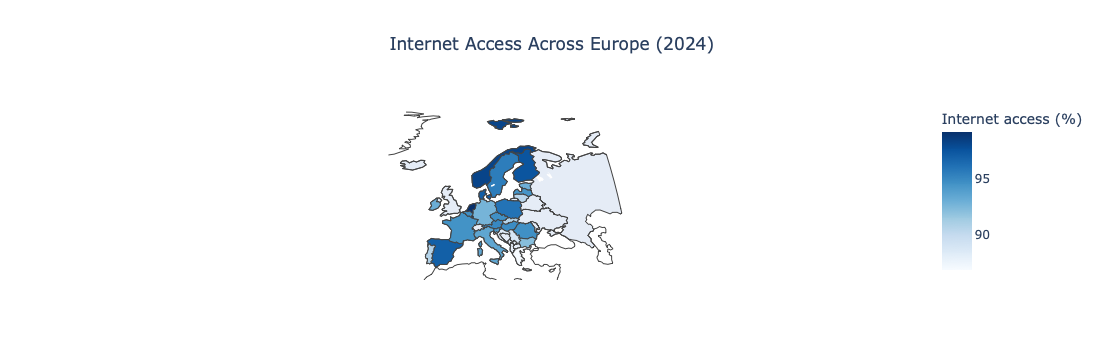

In [184]:
import plotly.express as px


fig = px.choropleth(
    master_clean,
    locations="country",
    locationmode="country names",
    color="internet_access_pct",
    color_continuous_scale="Blues",
    scope="europe",
    labels={"internet_access_pct": "Internet access (%)"},
    title="Internet Access Across Europe (2024)"
)

fig.update_layout(
    title={
        "x": 0.5,
        "xanchor": "center"
    },
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="natural earth"
    ),
    coloraxis_colorbar=dict(
        title="Internet access (%)"
    )
)


# 👇 SAVE THE FIGURE
fig.write_image(
    "outputs/figures/internet_access_choropleth_2024.png",
    width=1200,
    height=800,
    scale=2
)

# to show the figure in the notebook
fig.show()


At first glance, internet access appears nearly universal across Europe, with most countries reporting household access above 90%. However, subtle regional differences persist, particularly in parts of Southern and Eastern Europe.

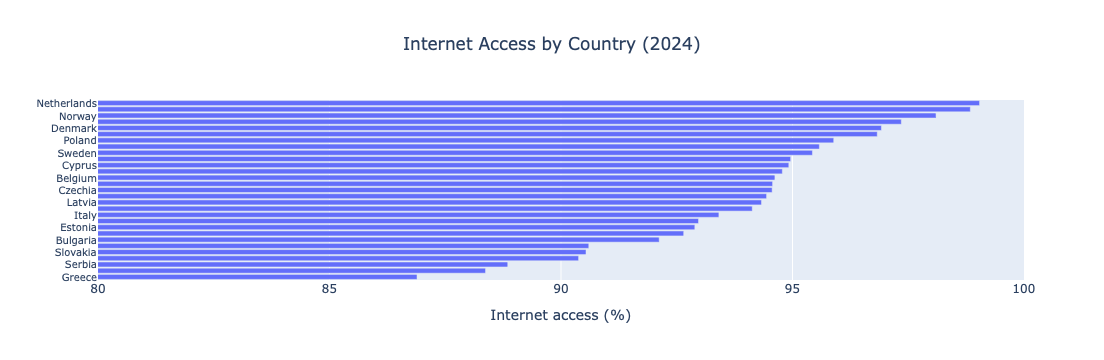

In [186]:
# Sort data by internet access
internet_sorted = master_clean.sort_values(
    by="internet_access_pct",
    ascending=True  # ascending=True works best for horizontal bars
)

fig = px.bar(
    internet_sorted,
    x="internet_access_pct",
    y="country",
    orientation="h",
    labels={"internet_access_pct": "Internet access (%)", "country": ""},
    title="Internet Access by Country (2024)"
)

fig.update_layout(
    title={"x": 0.5},
    xaxis_range=[80, 100],  # zoom in to show differences clearly
    yaxis=dict(tickfont=dict(size=10))
)

# Save the figure
fig.write_image(
    "outputs/figures/internet_access_ranking_2024.png",
    width=1200,
    height=900,
    scale=2
)

fig.show()

Figure 2. Internet access by country in 2024, sorted in ascending order.
While most European countries report high levels of household internet access,
a small group of countries lags behind. Even modest percentage differences
translate into substantial disparities in digital inclusion.


In [189]:
# Correlation
corr = master_clean["mean_income_eur"].corr(
    master_clean["internet_access_pct"]
)

# R-squared
r_squared = corr ** 2

corr, r_squared

(0.6367990972305207, 0.4055130902336062)

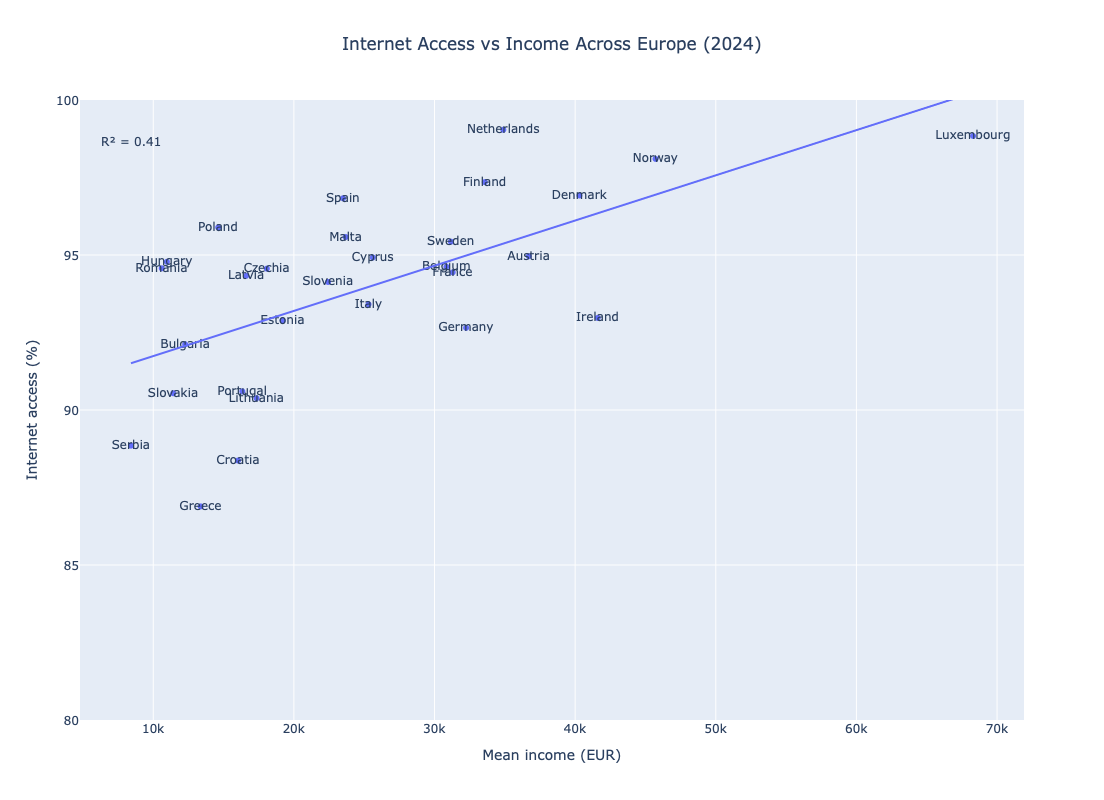

In [190]:
fig = px.scatter(
    master_clean,
    x="mean_income_eur",
    y="internet_access_pct",
    text="country",
    labels={
        "mean_income_eur": "Mean income (EUR)",
        "internet_access_pct": "Internet access (%)"
    },
    title="Internet Access vs Income Across Europe (2024)",
    trendline="ols"
)

# Improve readability
fig.update_traces(
    textposition="top center",
    marker=dict(size=9, opacity=0.8),
    selector=dict(mode="markers")
)

fig.update_layout(
    title={"x": 0.5},
    width=1200,   # ⬅️ increase this (e.g. 1400)
    height=800,   # ⬅️ increase this (e.g. 900)
    xaxis=dict(showgrid=True),
    yaxis=dict(range=[80, 100]),
    annotations=[
        dict(
            x=0.02,
            y=0.95,
            xref="paper",
            yref="paper",
            text=f"R² = {r_squared:.2f}",
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

# Save the figure
fig.write_image(
    "outputs/figures/internet_vs_income_2024.png",
    width=1200,
    height=800,
    scale=2
)

fig.show()

Figure 3 shows the relationship between mean income and household internet access
across European countries in 2024. A positive association is visible, indicating
that higher-income countries tend to exhibit higher levels of internet access.
However, the relationship is relatively weak, and a clear saturation effect
emerges at higher income levels.

Several high-income countries already approach universal access, suggesting that
income alone is insufficient to explain remaining disparities. Conversely, some
lower-income countries achieve relatively high access rates, highlighting the
role of policy, infrastructure investment, and market competition.


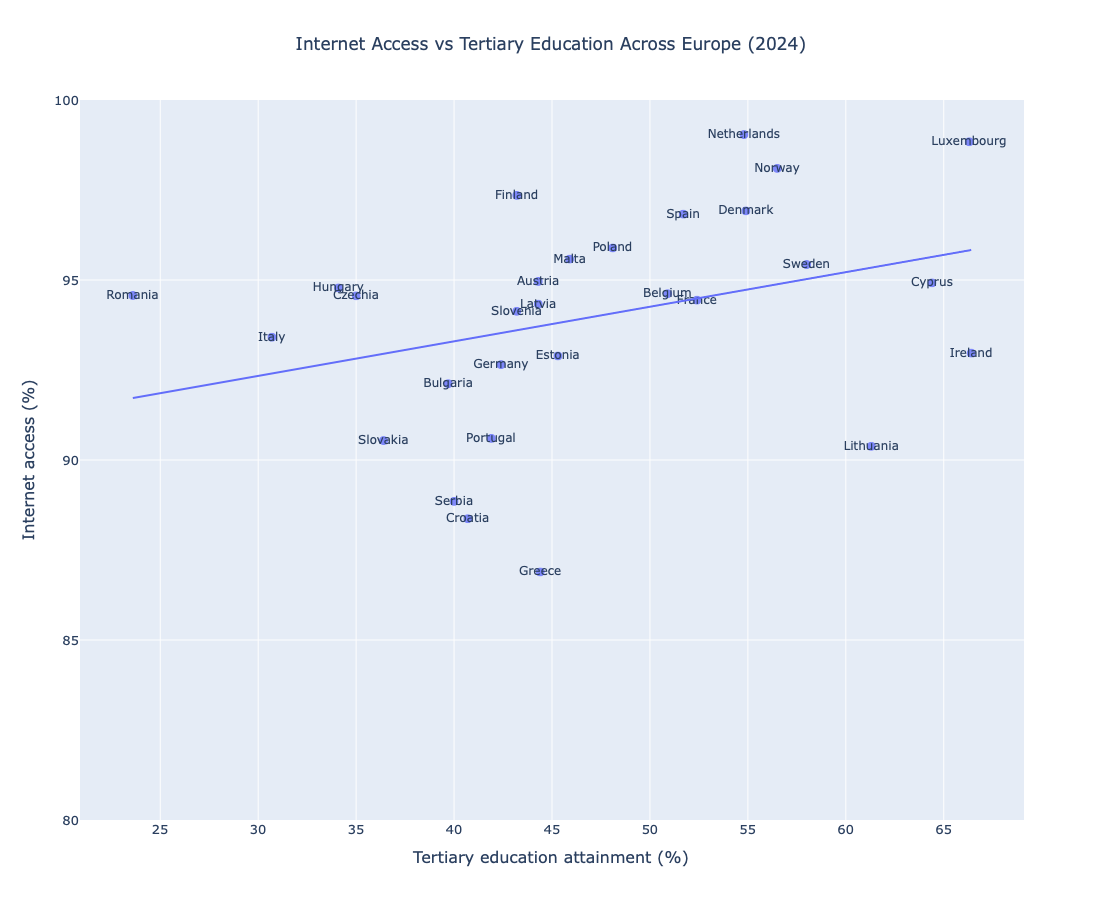

In [194]:
import plotly.express as px

fig = px.scatter(
    master_clean,
    text="country",
    x="tertiary_education_pct",
    y="internet_access_pct",
    labels={
        "tertiary_education_pct": "Tertiary education attainment (%)",
        "internet_access_pct": "Internet access (%)"
    },
    title="Internet Access vs Tertiary Education Across Europe (2024)",
    trendline="ols"
)

# Improve layout and readability
fig.update_traces(
    marker=dict(size=9, opacity=0.8)
)
# Improve readability
fig.update_traces(
    textposition="top center",
    marker=dict(size=9, opacity=0.8),
    selector=dict(mode="markers")
)
fig.update_layout(
    title={"x": 0.5},
    width=1200,
    height=900,
    xaxis=dict(
        showgrid=True,
        title_font=dict(size=16),
        tickfont=dict(size=13)
    ),
    yaxis=dict(
        range=[80, 100],
        title_font=dict(size=16),
        tickfont=dict(size=13)
    )
)

# Save the figure
fig.write_image(
    "outputs/figures/internet_vs_education_2024.png",
    width=1200,
    height=800,
    scale=2
)

fig.show()


Compared to income, education shows a weaker and more dispersed relationship
with internet access, suggesting that economic capacity explains more of the
variation in access than educational attainment alone.



While tertiary education attainment is positively associated with internet
access, the relationship is relatively weak and characterized by saturation.
This suggests that beyond a basic threshold, infrastructural and policy factors
play a more decisive role than educational composition alone.


In [197]:
# Correlation with income
corr_income = master_clean["internet_access_pct"].corr(
    master_clean["mean_income_eur"]
)

# Correlation with education
corr_education = master_clean["internet_access_pct"].corr(
    master_clean["tertiary_education_pct"]
)

corr_income, corr_education


(0.6367990972305206, 0.33496317154366373)

In [198]:
r2_income = corr_income ** 2
r2_education = corr_education ** 2

r2_income, r2_education

(0.4055130902336061, 0.11220032629058989)

In [199]:


comparison = pd.DataFrame({
    "Predictor": ["Income", "Education (30–34)"],
    "Correlation with Internet Access": [corr_income, corr_education],
    "R²": [r2_income, r2_education]
})

comparison


,Predictor,Correlation with Internet Access,R²
0,Income,0.636799,0.405513
1,Education (30–34),0.334963,0.112200


A quantitative comparison shows that income exhibits a substantially stronger
association with internet access than education. Income explains approximately
40% of the cross-country variation in internet access, while education accounts
for about 11%. This suggests that economic capacity plays a more prominent role
in enabling widespread access, although education remains a relevant but
secondary factor.


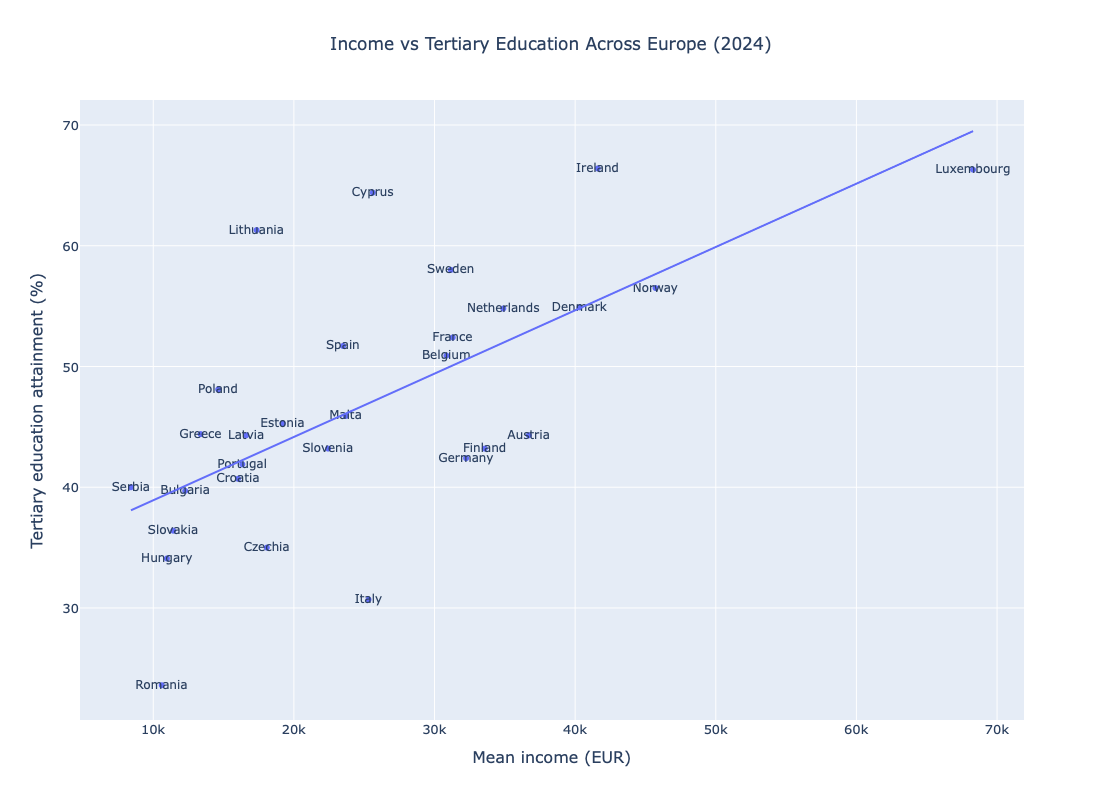

In [205]:
fig = px.scatter(
    master_clean,
    x="mean_income_eur",
    y="tertiary_education_pct",
    text="country",
    labels={
        "mean_income_eur": "Mean income (EUR)",
        "tertiary_education_pct": "Tertiary education attainment (%)"
    },
    title="Income vs Tertiary Education Across Europe (2024)",
    trendline="ols"
)

# Improve readability
fig.update_traces(
    textposition="top center",
    marker=dict(size=9, opacity=0.8),
    selector=dict(mode="markers")
)

fig.update_layout(
    title={"x": 0.5},
    width=1200,
    height=800,
    xaxis=dict(
        showgrid=True,
        title_font=dict(size=16),
        tickfont=dict(size=13)
    ),
    yaxis=dict(
        title_font=dict(size=16),
        tickfont=dict(size=13)
    )
)

# Save the figure
# fig.write_image(
#     "outputs/figures/income_vs_education_2024.png",
#     width=1200,
#     height=800,
#     scale=2
# )

fig.show()

Figure 5 provides a contextual comparison between income and education. While a
positive association is observable, the relationship is far from perfect, with
substantial variation across countries. This confirms that income and education
capture distinct socioeconomic dimensions and should not be treated as proxies
for one another in analyses of digital access.


Figure 5 shows a clear positive relationship between mean income and tertiary
education attainment across European countries. Most countries cluster around
the upward-sloping trend line, indicating that higher income levels are generally
associated with higher educational attainment. However, several notable outliers
exist. For example, Italy exhibits lower tertiary education attainment than would
be expected given its income level, while countries such as Lithuania and Ireland
achieve relatively high education outcomes at comparable income levels. These
deviations confirm that income and education, while related, are not interchangeable.


### My dataset currently has countries, not regions.We’ll add a simple, transparent region mapping.

In [210]:
# Region Mapping

region_map = {
    # Nordic
    "Denmark": "Nordic",
    "Finland": "Nordic",
    "Sweden": "Nordic",
    "Norway": "Nordic",
    "Iceland": "Nordic",

    # Western
    "Germany": "Western",
    "France": "Western",
    "Netherlands": "Western",
    "Belgium": "Western",
    "Austria": "Western",
    "Luxembourg": "Western",
    "Ireland": "Western",

    # Southern
    "Italy": "Southern",
    "Spain": "Southern",
    "Portugal": "Southern",
    "Greece": "Southern",
    "Croatia": "Southern",
    "Malta": "Southern",
    "Cyprus": "Southern",

    # Eastern
    "Poland": "Eastern",
    "Czechia": "Eastern",
    "Slovakia": "Eastern",
    "Hungary": "Eastern",
    "Romania": "Eastern",
    "Bulgaria": "Eastern",
    "Serbia": "Eastern",
    "Slovenia": "Eastern",
    "Latvia": "Eastern",
    "Lithuania": "Eastern",
    "Estonia": "Eastern",
    "North Macedonia": "Eastern",
    "Montenegro": "Eastern"
}

# Add region column
master_clean["region"] = master_clean["country"].map(region_map)


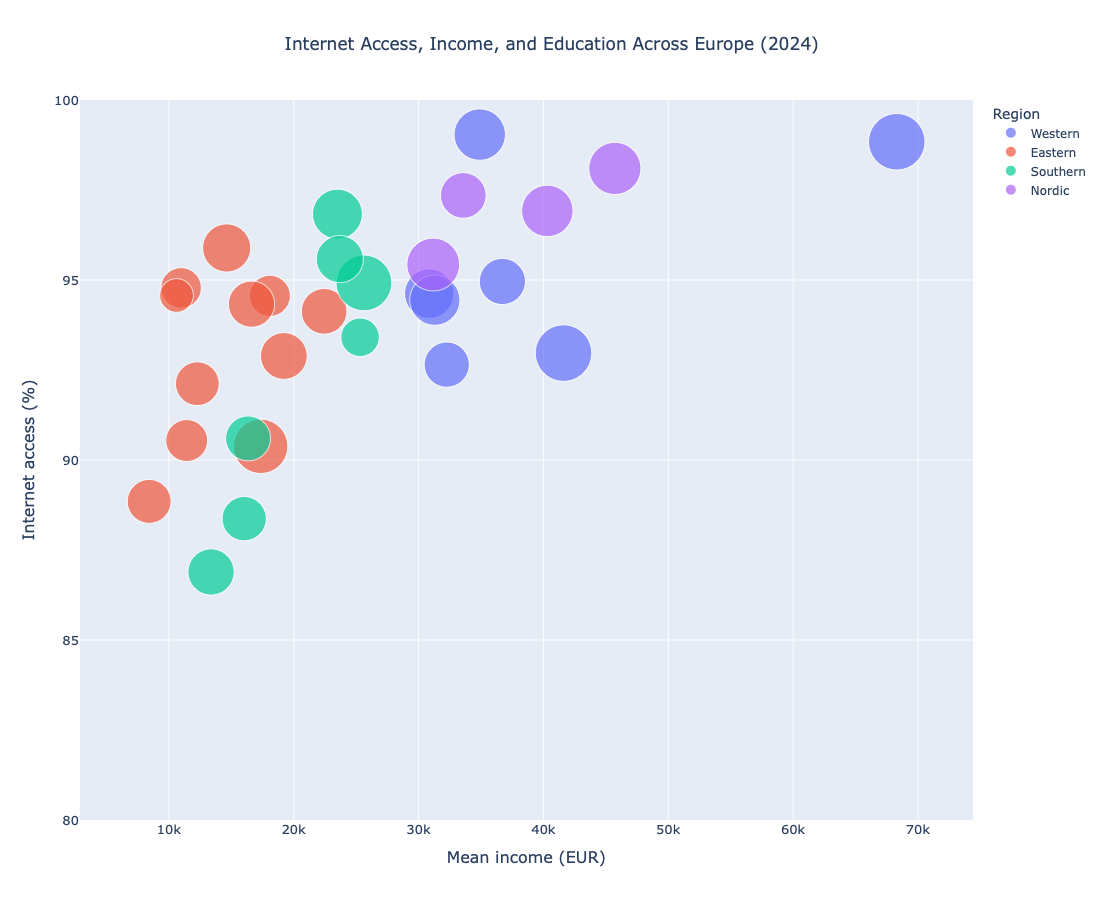

In [212]:

fig = px.scatter(
    master_clean,
    x="mean_income_eur",
    y="internet_access_pct",
    size="tertiary_education_pct",
    color="region",
    hover_name="country",
    size_max=40,
    labels={
        "mean_income_eur": "Mean income (EUR)",
        "internet_access_pct": "Internet access (%)",
        "tertiary_education_pct": "Tertiary education (%)",
        "region": "Region"
    },
    title="Internet Access, Income, and Education Across Europe (2024)"
)

fig.update_layout(
    title={"x": 0.5},
    width=1400,
    height=900,
    xaxis=dict(
        showgrid=True,
        title_font=dict(size=16),
        tickfont=dict(size=13)
    ),
    yaxis=dict(
        range=[80, 100],
        title_font=dict(size=16),
        tickfont=dict(size=13)
    )
)

# Save figure
fig.write_image(
    "outputs/figures/internet_income_education_bubble_2024.png",
    width=1400,
    height=900,
    scale=2
)

fig.show()


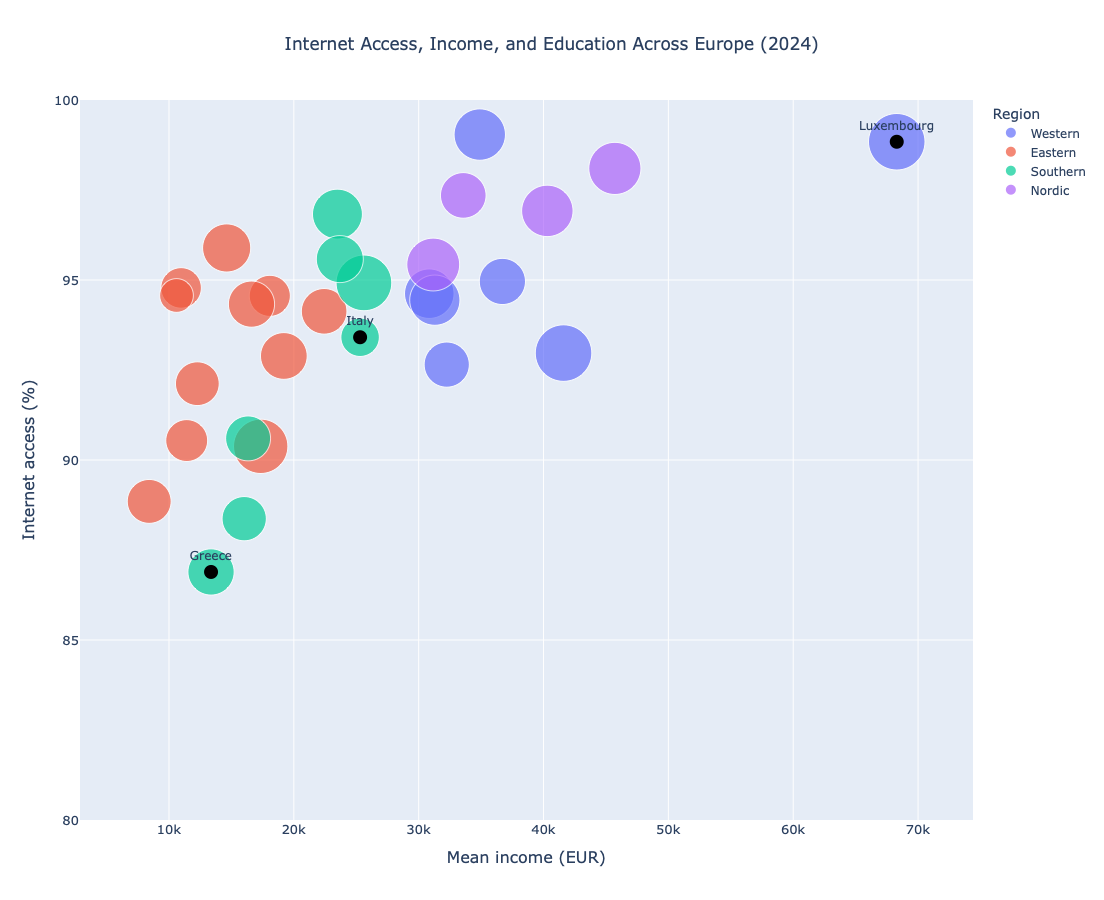

In [213]:
highlight = ["Luxembourg", "Italy", "Greece"]

highlight_df = master_clean[
    master_clean["country"].isin(highlight)
]

fig.add_scatter(
    x=highlight_df["mean_income_eur"],
    y=highlight_df["internet_access_pct"],
    mode="markers+text",
    text=highlight_df["country"],
    textposition="top center",
    marker=dict(size=14, color="black"),
    showlegend=False
)

fig.show()


Figure 6 synthesizes income, education, and internet access into a single
multivariate view. Clear regional patterns emerge, with Nordic and Western
European countries clustering at high income and near-universal access, while
Southern and Eastern Europe display greater heterogeneity. Bubble sizes reveal
that education levels vary substantially even among countries with similar
income and access levels. Notable deviations, such as Luxembourg, Italy, and
Greece, highlight that digital inclusion is shaped by structural and regional
factors beyond income or education alone.


## Residuals from income model

Given a country’s income, does it have more or less internet access than we would expect?

In [218]:
import numpy as np

# Drop missing values just in case
residual_df = master_clean.dropna(
    subset=["mean_income_eur", "internet_access_pct"]
).copy()

# Fit linear model: internet_access = a * income + b
coef = np.polyfit(
    residual_df["mean_income_eur"],
    residual_df["internet_access_pct"],
    deg=1
)

# Predicted internet access
residual_df["predicted_access"] = (
    coef[0] * residual_df["mean_income_eur"] + coef[1]
)

# Residuals = actual − predicted
residual_df["residual"] = (
    residual_df["internet_access_pct"] - residual_df["predicted_access"]
)

residual_df.head()


,country,year_x,internet_access_pct,year_y,mean_income_eur,year,tertiary_education_pct,education_level,region,predicted_access,residual
0,Austria,2024,94.96,2024,36705.0,2024,44.3,Tertiary education (levels 5-8),Western,95.633881,-0.673881
1,Belgium,2024,94.62,2024,30849.0,2024,50.9,Tertiary education (levels 5-8),Western,94.779821,-0.159821
2,Bulgaria,2024,92.12,2024,12271.0,2024,39.7,Tertiary education (levels 5-8),Eastern,92.070339,0.049661
3,Cyprus,2024,94.92,2024,25613.0,2024,64.4,Tertiary education (levels 5-8),Southern,94.016184,0.903816
4,Czechia,2024,94.56,2024,18075.0,2024,35.0,Tertiary education (levels 5-8),Eastern,92.916815,1.643185


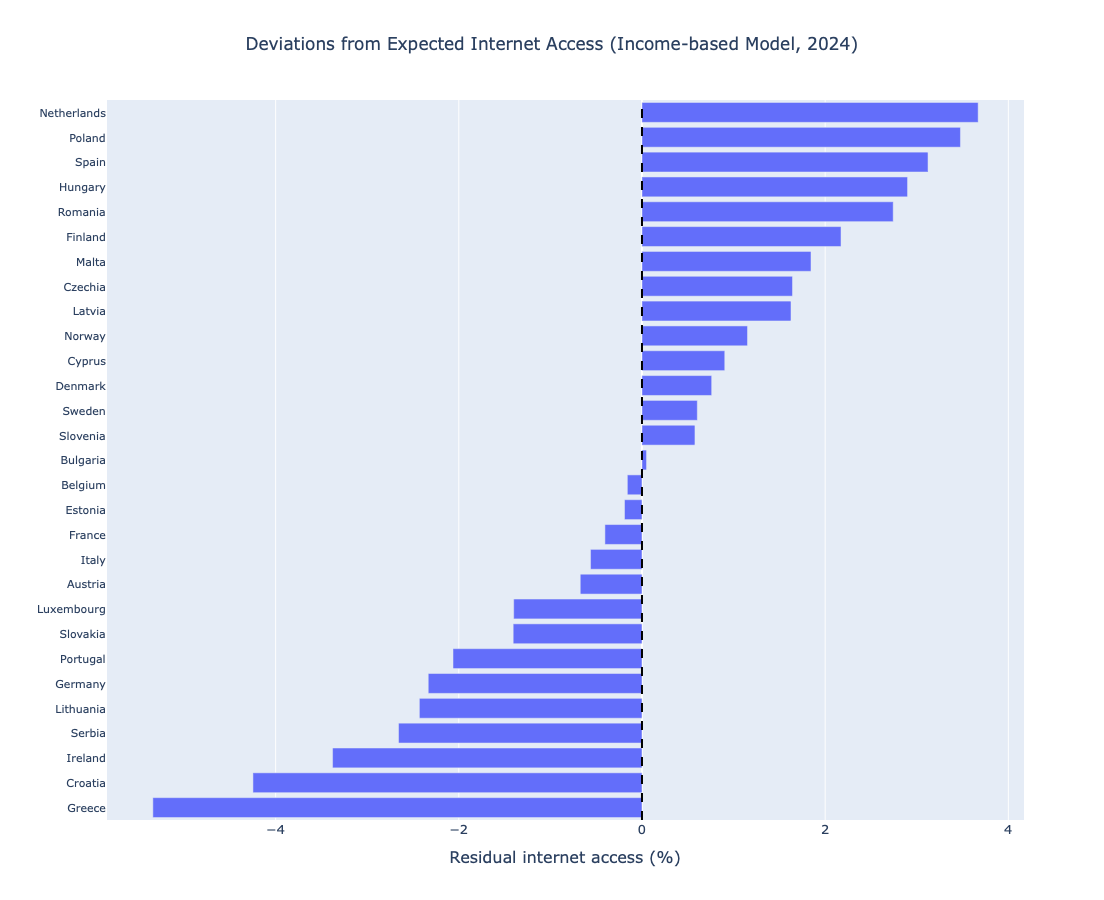

In [220]:
import plotly.express as px

# Sort by residual
residual_sorted = residual_df.sort_values("residual")

fig = px.bar(
    residual_sorted,
    x="residual",
    y="country",
    orientation="h",
    labels={
        "residual": "Residual internet access (%)",
        "country": ""
    },
    title="Deviations from Expected Internet Access (Income-based Model, 2024)"
)

# Zero reference line
fig.add_vline(
    x=0,
    line_dash="dash",
    line_color="black"
)

fig.update_layout(
    title={"x": 0.5},
    width=1200,
    height=900,
    xaxis=dict(
        title_font=dict(size=16),
        tickfont=dict(size=13)
    ),
    yaxis=dict(
        tickfont=dict(size=11)
    )
)

# Save figure
fig.write_image(
    "outputs/figures/internet_access_residuals_2024.png",
    width=1200,
    height=900,
    scale=2
)

fig.show()



Figure 7 shows deviations between observed internet access and values predicted
by a simple income-based model. Positive residuals indicate countries that achieve
higher access levels than expected given income, while negative residuals identify
underperformers. The presence of substantial deviations highlights the importance
of structural, infrastructural, and policy factors beyond economic capacity alone.


In [222]:
master_clean[[
    "internet_access_pct",
    "mean_income_eur",
    "tertiary_education_pct"
]].corr()


,internet_access_pct,mean_income_eur,tertiary_education_pct
internet_access_pct,1.000000,0.636799,0.334963
mean_income_eur,0.636799,1.000000,0.657650
tertiary_education_pct,0.334963,0.657650,1.000000


In [225]:
import statsmodels.api as sm

X = master_clean[[
    "mean_income_eur",
    "tertiary_education_pct"
]]

X = sm.add_constant(X)
y = master_clean["internet_access_pct"]

model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     internet_access_pct   R-squared:                       0.418
Model:                             OLS   Adj. R-squared:                  0.373
Method:                  Least Squares   F-statistic:                     9.333
Date:                 Tue, 03 Feb 2026   Prob (F-statistic):           0.000881
Time:                         12:35:19   Log-Likelihood:                -65.029
No. Observations:                   29   AIC:                             136.1
Df Residuals:                       26   BIC:                             140.2
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     91.7087      2.153     42.595      0.000      87.283      96.134
mean_income_eur            0.0002   4.55e-05      3.695      0.001    7.46e-05       0.000
tertiary_education_pct    -0.0424      0.057     -0.744      0.464      -0.160       0.075
==============================================================================
Omnibus:                        0.725   Durbin-Watson:                   2.358
Prob(Omnibus):                  0.696   Jarque-Bera (JB):                0.791
Skew:                          -0.302   Prob(JB):                        0.673
Kurtosis:                       2.461   Cond. No.                     1.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [230]:
from pathlib import Path

# make sure the processed folder exists
processed_path = Path("data/processed")
processed_path.mkdir(parents=True, exist_ok=True)

# save the final dataset
master_clean.to_csv(
    processed_path / "master_dataset_2024.csv",
    index=False
)